<a href="https://colab.research.google.com/github/Neuro-Algorithm/Mouse-Pose-Estimation/blob/main/Mouse_Pose_Estimation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install the latest DLC (includes SuperAnimal)

!pip install --pre deeplabcut

# 2. RESTART RUNTIME (Runtime → Restart runtime)

In [ ]:
from pathlib import Path
import deeplabcut

Loading DLC 3.0.0rc13...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [ ]:
from google.colab import files

print("Upload your mouse video file:")
uploaded = files.upload()

for filepath, content in uploaded.items():
    print(f' Uploaded: "{filepath}" ({len(content):,} bytes)')
    video_path = Path(filepath).resolve()

# If NOT using Colab, just specify your video path:
# video_path = "/path/to/working/directory/MousePoseEstimation-Neuro-2026-01-12/videos/m3v1mp4.mp4"

Upload your mouse video file:


Saving t8SB0nr_JnsQzHam.mp4 to t8SB0nr_JnsQzHam (1).mp4
 Uploaded: "t8SB0nr_JnsQzHam (1).mp4" (290,666 bytes)


In [ ]:
# For general quadrupeds (also works for mice):
# superanimal_name = "superanimal_quadruped"

# For mouse from top view:
superanimal_name = "superanimal_quadruped"  # Best for mouse tracking!
model_name = "hrnet_w32"  # Good accuracy
detector_name = "fasterrcnn_resnet50_fpn_v2"  # Good detection
pcutoff = 0.15  # Confidence threshold (lower = more points, higher = more confident points)

print(f"\n Using model: {superanimal_name}")
print(f" Network: {model_name}")
print(f" Detector: {detector_name}")
print(f" Confidence cutoff: {pcutoff}")


 Using model: superanimal_quadruped
 Network: hrnet_w32
 Detector: fasterrcnn_resnet50_fpn_v2
 Confidence cutoff: 0.15


In [ ]:
print("\n Analyzing video with SuperAnimal...")
print("This may take a few minutes...")

deeplabcut.video_inference_superanimal(
    [video_path],
    superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    videotype="mp4",  # e.g., ".mp4"
    video_adapt=False,  # Adapts to your video
    scale_list=[250],  # Auto-scale
    pcutoff=pcutoff,
)

print("Analysis complete!")


 Analyzing video with SuperAnimal...
This may take a few minutes...
Running video inference on [PosixPath('/content/t8SB0nr_JnsQzHam (1).mp4')] with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
Processing video /content/t8SB0nr_JnsQzHam (1).mp4
Starting to analyze /content/t8SB0nr_JnsQzHam (1).mp4
Video metadata: 
  Overall # of frames:    514
  Duration of video [s]:  8.56
  fps:                    60.04
  resolution:             w=602, h=360

Running detector with batch size 1


100%|██████████| 514/514 [01:25<00:00,  6.02it/s]


Running pose prediction with batch size 1


100%|██████████| 514/514 [00:21<00:00, 24.25it/s]


Saving results to /content
Saving results in /content/t8SB0nr_JnsQzHam (1)_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5 and /content/t8SB0nr_JnsQzHam (1)_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__full.pickle


/usr/local/lib/python3.12/dist-packages/deeplabcut/utils/make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Duration of video [s]: 8.56, recorded with 60.04 fps!
Overall # of frames: 514 with cropped frame dimensions: 602 360
Generating frames and creating video.


100%|██████████| 514/514 [00:04<00:00, 108.99it/s]

Video with predictions was saved as /content
Analysis complete!


In [ ]:
videotype = video_path.suffix
scale_list = []

deeplabcut.video_inference_superanimal(
    [video_path],
    superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    videotype=videotype,
    video_adapt=False,
    scale_list=scale_list,
    pcutoff=pcutoff,
)

Running video inference on [PosixPath('/content/t8SB0nr_JnsQzHam (1).mp4')] with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
Processing video /content/t8SB0nr_JnsQzHam (1).mp4
Starting to analyze /content/t8SB0nr_JnsQzHam (1).mp4
Video metadata: 
  Overall # of frames:    514
  Duration of video [s]:  8.56
  fps:                    60.04
  resolution:             w=602, h=360

Running detector with batch size 1


100%|██████████| 514/514 [01:28<00:00,  5.80it/s]


Running pose prediction with batch size 1


100%|██████████| 514/514 [00:21<00:00, 23.49it/s]


Saving results to /content
Saving results in /content/t8SB0nr_JnsQzHam (1)_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5 and /content/t8SB0nr_JnsQzHam (1)_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__full.pickle


/usr/local/lib/python3.12/dist-packages/deeplabcut/utils/make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Duration of video [s]: 8.56, recorded with 60.04 fps!
Overall # of frames: 514 with cropped frame dimensions: 602 360
Generating frames and creating video.


100%|██████████| 514/514 [00:04<00:00, 111.72it/s]


Video with predictions was saved as /content


{PosixPath('/content/t8SB0nr_JnsQzHam (1).mp4'): scorer      superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_  \
 individuals                                                     animal0   
 bodyparts                                                          nose   
 coords                                                                x   
 0                                                   356.601562            
 1                                                   356.601562            
 2                                                   353.671875            
 3                                                   353.335938            
 4                                                   357.000000            
 ..                                                         ...            
 509                                                 359.015625            
 510                                                 360.812500            
 511                                    

In [ ]:
from base64 import b64encode
from IPython.display import HTML
import glob


In [ ]:
import pandas as pd

# Define the h5 file path
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'

# Load the data
df = pd.read_hdf(h5_file)

# Get frame data
frame_data = df.iloc[0]

# Extract animal0 data
animal_data = frame_data['superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_']['animal0']

# See what bodyparts are available
print("Available bodyparts:")
for bp in animal_data.index.get_level_values(0).unique():
    print(f"  - {bp}")

Available bodyparts:
  - nose
  - upper_jaw
  - lower_jaw
  - mouth_end_right
  - mouth_end_left
  - right_eye
  - right_earbase
  - right_earend
  - right_antler_base
  - right_antler_end
  - left_eye
  - left_earbase
  - left_earend
  - left_antler_base
  - left_antler_end
  - neck_base
  - neck_end
  - throat_base
  - throat_end
  - back_base
  - back_end
  - back_middle
  - tail_base
  - tail_end
  - front_left_thai
  - front_left_knee
  - front_left_paw
  - front_right_thai
  - front_right_knee
  - front_right_paw
  - back_left_paw
  - back_left_thai
  - back_right_thai
  - back_left_knee
  - back_right_knee
  - back_right_paw
  - belly_bottom
  - body_middle_right
  - body_middle_left


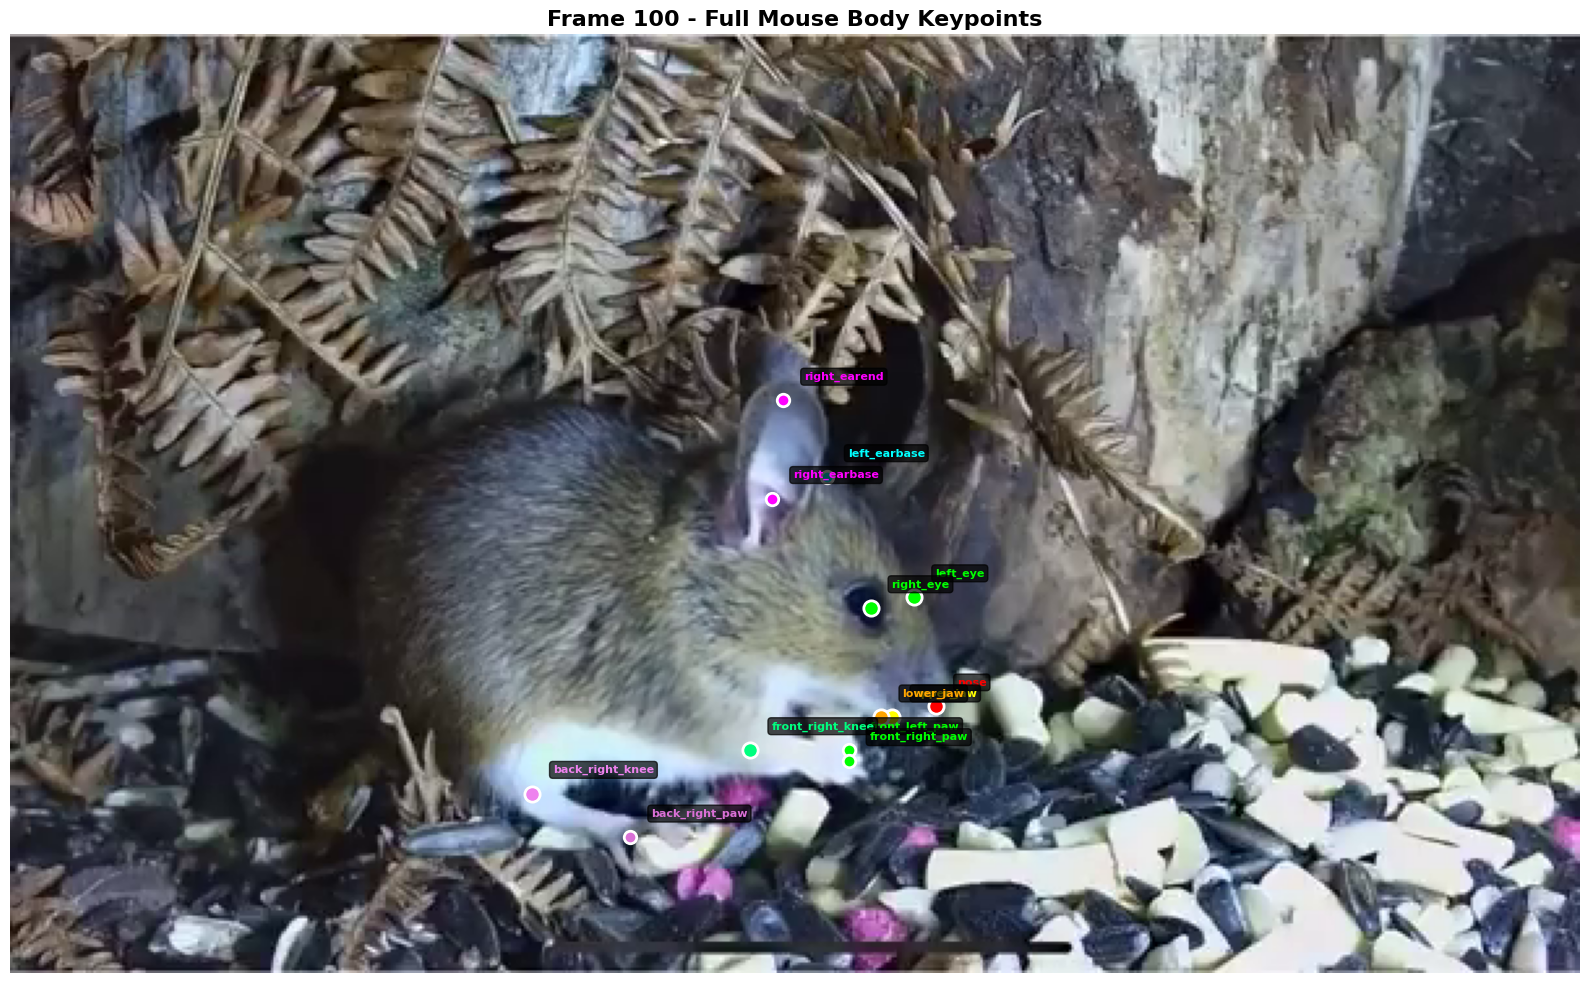


KEYPOINT CONFIDENCES

EARS:
  Left ear base:  0.579
  Left ear end:   0.280
  Right ear base: 0.664
  Right ear end:  0.757

BODY MIDDLE:
  Left:  0.454
  Right: 0.462

FRONT LEGS:
  Left knee:  0.400
  Left paw:   0.699
  Right knee: 0.545
  Right paw:  0.880

BACK LEGS:
  Left knee:  0.193
  Left paw:   0.216
  Right knee: 0.734
  Right paw:  0.793


In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Define paths
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
video_path = '/content/t8SB0nr_JnsQzHam.mp4'

# Load predictions
df = pd.read_hdf(h5_file)

# Load a frame from the video
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)  # Frame 100
ret, frame = cap.read()
cap.release()

# Get predictions for frame 100
frame_data = df.iloc[100]

# Extract animal0 data
animal_data = frame_data['superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_']['animal0']

# Plot keypoints with high confidence
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Define bodyparts to plot (head, ears, body, paws, knees)
bodyparts_to_plot = [
    # Head
    'nose', 'upper_jaw', 'lower_jaw',
    'left_eye', 'right_eye',

    # Ears
    'left_earbase', 'left_earend',
    'right_earbase', 'right_earend',

    # Body middle
    'body_middle_left', 'body_middle_right',

    # Front legs
    'front_left_knee', 'front_left_paw',
    'front_right_knee', 'front_right_paw',

    # Back legs
    'back_left_knee', 'back_left_paw',
    'back_right_knee', 'back_right_paw'
]

# Define colors for different body parts
colors = {
    # Head
    'nose': 'red',
    'upper_jaw': 'yellow',
    'lower_jaw': 'orange',
    'left_eye': 'lime',
    'right_eye': 'lime',

    # Ears
    'left_earbase': 'cyan',
    'left_earend': 'cyan',
    'right_earbase': 'magenta',
    'right_earend': 'magenta',


    # Front legs (green shades)
    'front_left_knee': 'springgreen',
    'front_left_paw': 'lime',
    'front_right_knee': 'springgreen',
    'front_right_paw': 'lime',

    # Back legs (purple shades)
    'back_left_knee': 'violet',
    'back_left_paw': 'orchid',
    'back_right_knee': 'violet',
    'back_right_paw': 'orchid'
}

for bodypart in bodyparts_to_plot:
    x = animal_data[bodypart]['x']
    y = animal_data[bodypart]['y']
    likelihood = animal_data[bodypart]['likelihood']

    if likelihood > 0.5:  # Only show confident predictions
        color = colors.get(bodypart, 'white')

        # Bigger markers for ears and paws
        if 'ear' in bodypart or 'paw' in bodypart:
            markersize = 9
        else:
            markersize = 11

        plt.plot(x, y, 'o', color=color, markersize=markersize,
                markeredgecolor='white', markeredgewidth=2)
        plt.text(x+8, y-8, bodypart, fontsize=8, color=color,
                weight='bold', bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

plt.title('Frame 100 - Full Mouse Body Keypoints', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Print confidences organized by body region
print("\n" + "="*50)
print("KEYPOINT CONFIDENCES")
print("="*50)

print("\nEARS:")
print(f"  Left ear base:  {animal_data['left_earbase']['likelihood']:.3f}")
print(f"  Left ear end:   {animal_data['left_earend']['likelihood']:.3f}")
print(f"  Right ear base: {animal_data['right_earbase']['likelihood']:.3f}")
print(f"  Right ear end:  {animal_data['right_earend']['likelihood']:.3f}")

print("\nBODY MIDDLE:")
print(f"  Left:  {animal_data['body_middle_left']['likelihood']:.3f}")
print(f"  Right: {animal_data['body_middle_right']['likelihood']:.3f}")

print("\nFRONT LEGS:")
print(f"  Left knee:  {animal_data['front_left_knee']['likelihood']:.3f}")
print(f"  Left paw:   {animal_data['front_left_paw']['likelihood']:.3f}")
print(f"  Right knee: {animal_data['front_right_knee']['likelihood']:.3f}")
print(f"  Right paw:  {animal_data['front_right_paw']['likelihood']:.3f}")

print("\nBACK LEGS:")
print(f"  Left knee:  {animal_data['back_left_knee']['likelihood']:.3f}")
print(f"  Left paw:   {animal_data['back_left_paw']['likelihood']:.3f}")
print(f"  Right knee: {animal_data['back_right_knee']['likelihood']:.3f}")
print(f"  Right paw:  {animal_data['back_right_paw']['likelihood']:.3f}")

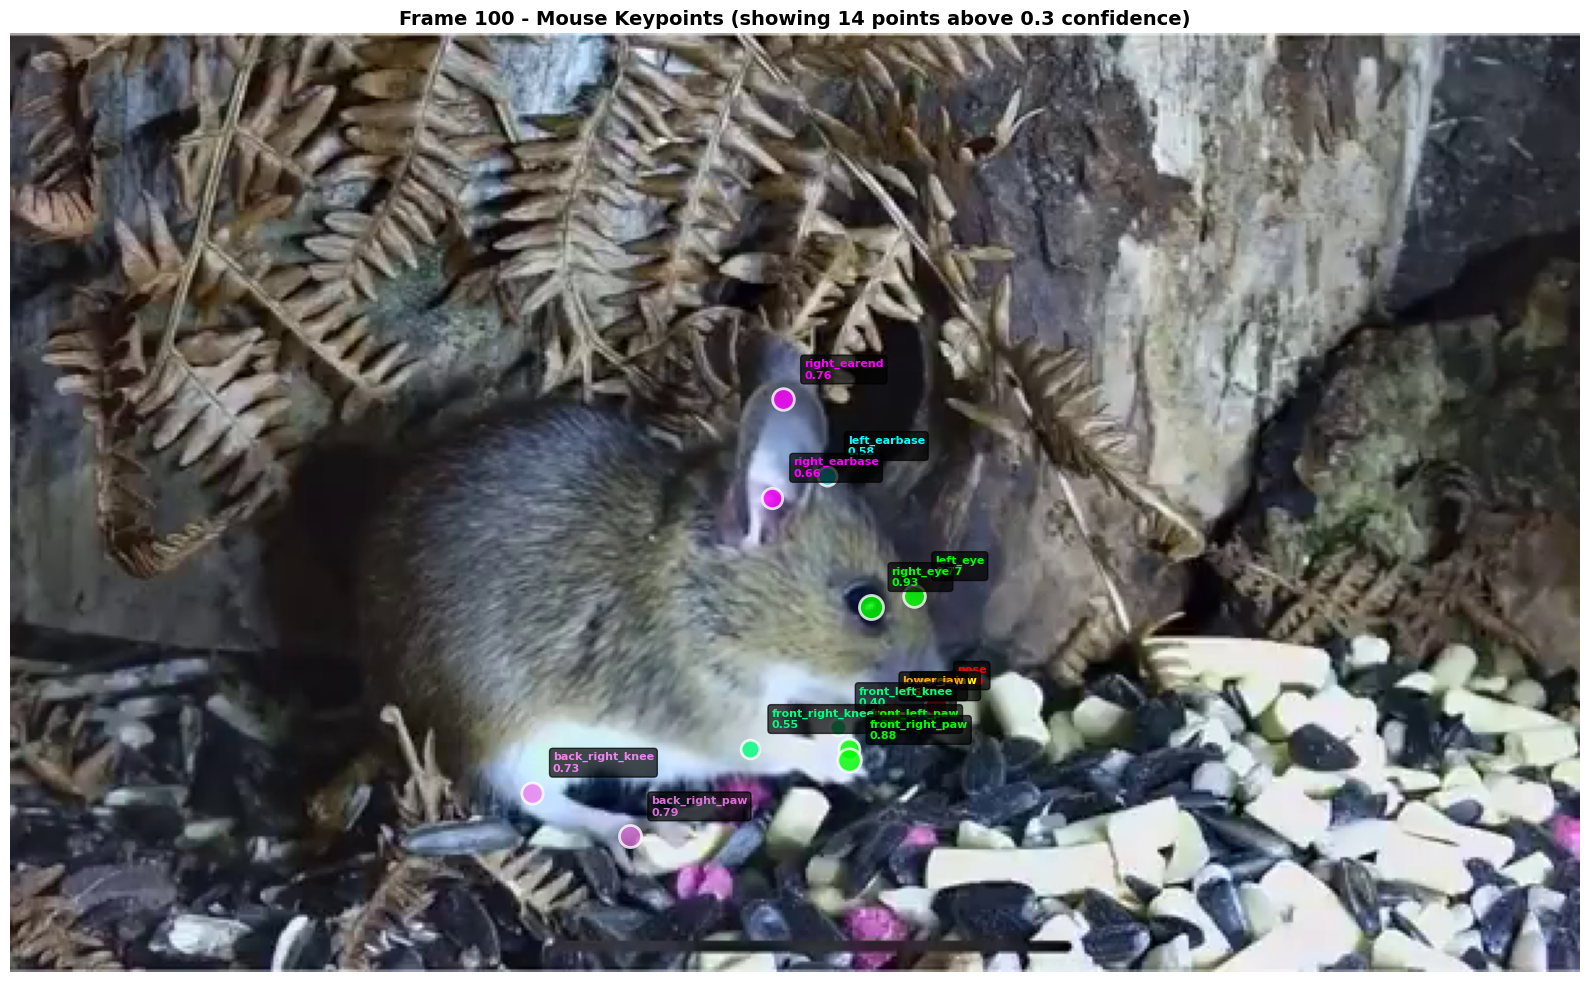


KEYPOINT CONFIDENCE SUMMARY

EARS:
  left_earbase        : 0.579 MEDIUM
  left_earend         : 0.280 LOW
  right_earbase       : 0.664 MEDIUM
  right_earend        : 0.757 HIGH

BODY:
  body_middle_left    : 0.454 MEDIUM
  body_middle_right   : 0.462 MEDIUM

FRONT LEGS:
  front_left_knee     : 0.400 MEDIUM
  front_left_paw      : 0.699 MEDIUM
  front_right_knee    : 0.545 MEDIUM
  front_right_paw     : 0.880 HIGH

BACK LEGS:
  back_left_knee      : 0.193 LOW
  back_left_paw       : 0.216 LOW
  back_right_knee     : 0.734 HIGH
  back_right_paw      : 0.793 HIGH


In [ ]:


# Define paths
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
video_path = '/content/t8SB0nr_JnsQzHam.mp4'

# Load predictions
df = pd.read_hdf(h5_file)

# Load a frame from the video
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)  # Frame 100
ret, frame = cap.read()
cap.release()

# Get predictions for frame 100
frame_data = df.iloc[100]

# Extract animal0 data
animal_data = frame_data['superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_']['animal0']

# Plot keypoints with high confidence
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Define bodyparts to plot
bodyparts_to_plot = [
    # Head
    'nose', 'upper_jaw', 'lower_jaw', 'left_eye', 'right_eye',

    # Ears
    'left_earbase', 'left_earend', 'right_earbase', 'right_earend',

    # Front legs
    'front_left_knee', 'front_left_paw',
    'front_right_knee', 'front_right_paw',

    # Back legs
    'back_left_knee', 'back_left_paw',
    'back_right_knee', 'back_right_paw'
]

# Define colors
colors = {
    'nose': 'red', 'upper_jaw': 'yellow', 'lower_jaw': 'orange',
    'left_eye': 'lime', 'right_eye': 'lime',
    'left_earbase': 'cyan', 'left_earend': 'cyan',
    'right_earbase': 'magenta', 'right_earend': 'magenta',
    'body_middle_left': 'blue', 'body_middle_right': 'blue',
    'front_left_knee': 'springgreen', 'front_left_paw': 'lime',
    'front_right_knee': 'springgreen', 'front_right_paw': 'lime',
    'back_left_knee': 'violet', 'back_left_paw': 'orchid',
    'back_right_knee': 'violet', 'back_right_paw': 'orchid'
}

# Lower confidence threshold to show more points
confidence_threshold = 0.3  # Changed from 0.5 to 0.3

plotted_count = 0
for bodypart in bodyparts_to_plot:
    x = animal_data[bodypart]['x']
    y = animal_data[bodypart]['y']
    likelihood = animal_data[bodypart]['likelihood']

    if likelihood > confidence_threshold:
        color = colors.get(bodypart, 'white')

        # Size based on confidence
        markersize = 8 + (likelihood * 10)  # Bigger for higher confidence

        plt.plot(x, y, 'o', color=color, markersize=markersize,
                markeredgecolor='white', markeredgewidth=2, alpha=0.8)

        # Add label with confidence score
        plt.text(x+8, y-8, f"{bodypart}\n{likelihood:.2f}",
                fontsize=8, color=color, weight='bold',
                bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

        plotted_count += 1

plt.title(f'Frame 100 - Mouse Keypoints (showing {plotted_count} points above {confidence_threshold} confidence)',
         fontsize=14, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Show confidence summary with color coding
print("\n" + "="*60)
print("KEYPOINT CONFIDENCE SUMMARY")
print("="*60)

def get_quality(conf):
    if conf > 0.7:
        return "HIGH"
    elif conf > 0.4:
        return "MEDIUM"
    else:
        return "LOW"

print("\nEARS:")
for ear in ['left_earbase', 'left_earend', 'right_earbase', 'right_earend']:
    conf = animal_data[ear]['likelihood']
    print(f"  {ear:20s}: {conf:.3f} {get_quality(conf)}")

print("\nBODY:")
for body in ['body_middle_left', 'body_middle_right']:
    conf = animal_data[body]['likelihood']
    print(f"  {body:20s}: {conf:.3f} {get_quality(conf)}")

print("\nFRONT LEGS:")
for leg in ['front_left_knee', 'front_left_paw', 'front_right_knee', 'front_right_paw']:
    conf = animal_data[leg]['likelihood']
    print(f"  {leg:20s}: {conf:.3f} {get_quality(conf)}")

print("\nBACK LEGS:")
for leg in ['back_left_knee', 'back_left_paw', 'back_right_knee', 'back_right_paw']:
    conf = animal_data[leg]['likelihood']
    print(f"  {leg:20s}: {conf:.3f} {get_quality(conf)}")

In [ ]:
from google.colab import files

# Download the labeled video
labeled_video = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4'
files.download(labeled_video)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Original video
original_video = open('/content/t8SB0nr_JnsQzHam.mp4', 'rb').read()
original_url = "data:video/mp4;base64," + b64encode(original_video).decode()

# Labeled video
labeled_video = open('/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4', 'rb').read()
labeled_url = "data:video/mp4;base64," + b64encode(labeled_video).decode()

# Display both side by side
HTML(f"""
<div style="display: flex; gap: 20px;">
    <div>
        <h3>Original Video</h3>
        <video width=400 controls>
            <source src="{original_url}" type="video/mp4">
        </video>
    </div>
    <div>
        <h3>Labeled Video</h3>
        <video width=400 controls>
            <source src="{labeled_url}" type="video/mp4">
        </video>
    </div>
</div>
""")